## Rejection Sampling

useful for sampling from difficult to sample from distributions.
in rejection sampling we create a proposal distribution $q(x)$ that satisfies $Mq(x)\geq \tilde{p}(x)$ for some constant $M$ where $\tilde{p}(x)$ is the unormalized version of $p(x)$ IE $p(x)=\frac{\tilde{p}(x)}{Z_p}$ meaning the target distribution has to be entirely under the scaled proposal distribution

the function $Mq(x)$provides an upper envelope for $\tilde{p}$ we then sample $x\sim q(x)$ which corresponds to picking a random $x$ location and then sample $u\sim \mathbb{U}(0,1)$ which corresponds to picking a random $y$ location under the envelope.

if $u>\frac{\tilde{p}(x)}{Mq(x)}$ we reject the sample else we accept it

say we want to sample from a mixture of gaussians $\mathbb{N}(30,10)+\mathbb{N}(80,20$


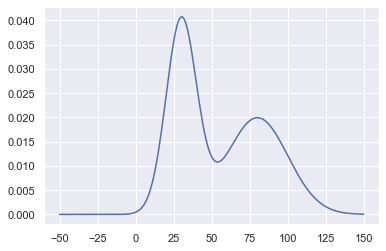

In [4]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt


sns.set()
x = np.arange(-50, 151)

def p(x):
    return st.norm.pdf(x, loc=30, scale=10) + st.norm.pdf(x, loc=80, scale=20)
#
plt.plot(x, p(x), )


say we pick $\mathbb{N}(50,30)$ as the proposal distribution $q(x)$


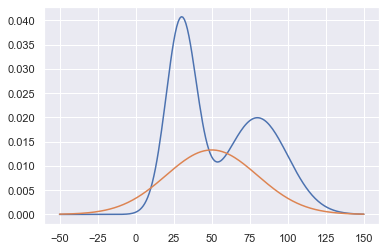

In [6]:
def q(x):
    return st.norm.pdf(x, loc=50, scale=30)

plt.plot(x, p(x))
plt.plot(x, q(x))

this wont work because the target isnt completely under the proposed, so we need to scale it
$k=max(\frac{p(x}{q(x)}) \; \forall \; x$

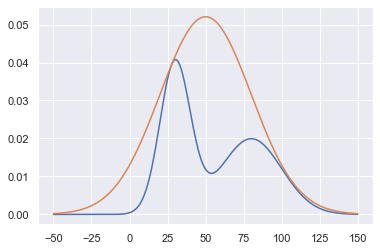

In [9]:
k = max(p(x) / q(x))
plt.plot(x, p(x))
plt.plot(x, k*q(x))

this distribution should work

<AxesSubplot:>

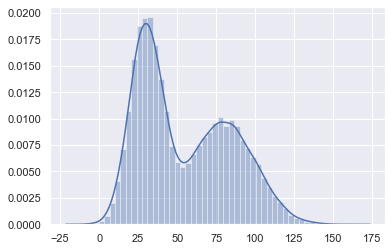

In [11]:
def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(50, 30)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

s = rejection_sampling(iter=100000)
sns.distplot(s)